Mental health Analysis and Prediction System (MHIPS)


1.   Yash Dinesh Harjani - ys959012@dal.ca
2.   Shail Rajeshbhai Kardani - sh475913@dal.ca
3.   Akshita Shyam Mendon - ak621149@dal.ca


  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import joblib
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import chi2_contingency, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error
)
from imblearn.metrics import geometric_mean_score
import pydotplus
from IPython.display import Image


In [ ]:
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 

In [ ]:
data = pd.read_csv("/content/drive/My Drive/PDS_Project/Mental Health Dataset.csv")
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
data = data.drop(['Timestamp'], axis=1)
data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
import warnings
# Took help to write this function from Tutorial notes.
def categorical_features_report(data_df):
    def _mode(col):
        return col.mode().iloc[0] if not col.mode().empty else None

    def _mode_freq(col):
        return col.value_counts().iloc[0] if not col.value_counts().empty else 0

    def _second_mode(col):
        mode_value = _mode(col)
        second_mode = col[col != mode_value].mode()
        return second_mode.iloc[0] if not second_mode.empty else None

    def _second_mode_freq(col):
        mode_value = _mode(col)
        second_mode_value = _second_mode(col)
        if second_mode_value is not None:
            return col[col == second_mode_value].count()
        return 0

    stats = {
        "Count": lambda col: col.size,
        "Miss %": lambda col: col.isna().mean() * 100,
        "Card.": lambda col: col.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda col: (_mode_freq(col) / col.size * 100) if col.size > 0 else 0,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda col: (_second_mode_freq(col) / col.size * 100) if col.size > 0 else 0,
    }

    # Select only categorical features
    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    report_data = []

    for col_name in cat_feat_names:
        col_data = data_df[col_name]
        feature_stats = {stat_name: fn(col_data) for stat_name, fn in stats.items()}
        feature_stats["Feature"] = col_name
        report_data.append(feature_stats)

    # Convert to DataFrame
    report_df = pd.DataFrame(report_data)
    return report_df

In [ ]:
categorical_report = categorical_features_report(data)
categorical_report

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %,Feature
0,292364,0.000000,2,Male,239850,82.038144,Female,52514,17.961856,Gender
1,292364,0.000000,35,United States,171308,58.594081,United Kingdom,51404,17.582192,Country
2,292364,0.000000,5,Housewife,66351,22.694655,Student,61794,21.135981,Occupation
3,292364,1.779289,2,No,257994,88.244107,Yes,29168,9.976605,self_employed
4,292364,0.000000,2,No,176832,60.483507,Yes,115532,39.516493,family_history
5,292364,0.000000,2,Yes,147606,50.487064,No,144758,49.512936,treatment
6,292364,0.000000,5,1-14 days,63548,21.735918,31-60 days,60705,20.763500,Days_Indoors
7,292364,0.000000,3,Maybe,99985,34.198807,Yes,99653,34.085250,Growing_Stress
8,292364,0.000000,3,Yes,109523,37.461179,Maybe,95166,32.550519,Changes_Habits
9,292364,0.000000,3,No,104018,35.578252,Maybe,95378,32.623032,Mental_Health_History


This report gives us a brief overview of the distribution of the data. Lets dive a little deeper with Exploratory Data Analysis for the entire data.

# 1. Exploratory Data Analysis

## 1.1 Cleaning data

In [ ]:
MentalHealthDataCopy = data.copy()

In [ ]:
# This utility function produces a report on mising values and duplicate records

def getMissingAndDuplicateRecords(df: pd.DataFrame):
    # Missing Values Calculation
    missing_values_count = df.isnull().sum()
    total_records = len(df)
    completeness = (missing_values_count / total_records) * 100
    completeness_df = pd.DataFrame({'Feature': missing_values_count.index,
                                    'Missing Values (%)': completeness.values.round(2)})

    # Duplicate Records Calculation
    duplicated_count = df.duplicated().sum()
    uniqueness_df = pd.DataFrame({
        'Total Records': [total_records],
        'Duplicate Records': [duplicated_count]
    })

    return {'Completeness Report': completeness_df, 'Uniqueness Report': uniqueness_df}


In [ ]:
MissingAndDuplicateRecordsReport = getMissingAndDuplicateRecords(MentalHealthDataCopy)
print(MissingAndDuplicateRecordsReport['Completeness Report'])
print(MissingAndDuplicateRecordsReport['Uniqueness Report'])

                    Feature  Missing Values (%)
0                    Gender                0.00
1                   Country                0.00
2                Occupation                0.00
3             self_employed                1.78
4            family_history                0.00
5                 treatment                0.00
6              Days_Indoors                0.00
7            Growing_Stress                0.00
8            Changes_Habits                0.00
9     Mental_Health_History                0.00
10              Mood_Swings                0.00
11         Coping_Struggles                0.00
12            Work_Interest                0.00
13          Social_Weakness                0.00
14  mental_health_interview                0.00
15             care_options                0.00
   Total Records  Duplicate Records
0         292364             194641


self_employed feature has 1.78% missing values and there are 194641 duplicate records in the dataset (which can subsequently cause model to overfit).

In [ ]:
# This function helps in handling missing values. Since there is only one feature with missing values, we will replace them
# with the most frequent value.

def handleMissingvalues(df):

    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    # Impute missing values for categorical features using the most frequent value
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

    return df

In [ ]:
# Removing duplicate records from the data:

def removerDuplicateRecords(df):
    df = df.drop_duplicates()
    return df

In [ ]:
MentalHealthDataCopy = handleMissingvalues(MentalHealthDataCopy)

In [ ]:
MentalHealthDataCopy = removerDuplicateRecords(MentalHealthDataCopy)

In [ ]:
# Regenerating Mssing and Duplicate records report. This reveals that no missing values exist and all the records are unique.

MissingAndDuplicateRecordsReport = getMissingAndDuplicateRecords(MentalHealthDataCopy)
print(MissingAndDuplicateRecordsReport['Completeness Report'])
print(MissingAndDuplicateRecordsReport['Uniqueness Report'])

                    Feature  Missing Values (%)
0                    Gender                 0.0
1                   Country                 0.0
2                Occupation                 0.0
3             self_employed                 0.0
4            family_history                 0.0
5                 treatment                 0.0
6              Days_Indoors                 0.0
7            Growing_Stress                 0.0
8            Changes_Habits                 0.0
9     Mental_Health_History                 0.0
10              Mood_Swings                 0.0
11         Coping_Struggles                 0.0
12            Work_Interest                 0.0
13          Social_Weakness                 0.0
14  mental_health_interview                 0.0
15             care_options                 0.0
   Total Records  Duplicate Records
0          94090                  0


## 1.2 Data Visualization

This section contains various data visualization done on the categorical feature.

In [ ]:
# This function gives us a brief visualization of all the features against

plt.rcParams["figure.figsize"] = [12, 8]


def visualizeFeatures(df):
    categorical_columns = df.select_dtypes(exclude=["number"]).columns

    # Set up subplots to display multiple plots in one figure
    num_cols = len(categorical_columns)
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=min(3, num_cols), figsize=(15, 5 * ((num_cols // 3) + 1)))
    axes = axes.flatten()

    colors = sns.color_palette("husl", num_cols)

    for i, column in enumerate(categorical_columns):
        df[column].value_counts().plot(kind='bar', color=colors[i], edgecolor='black', alpha=0.85, ax=axes[i])
        axes[i].set_title(f'Categorical Feature: {column}', fontsize=12)
        axes[i].set_xlabel(column, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        axes[i].grid(axis='y', alpha=0.75)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

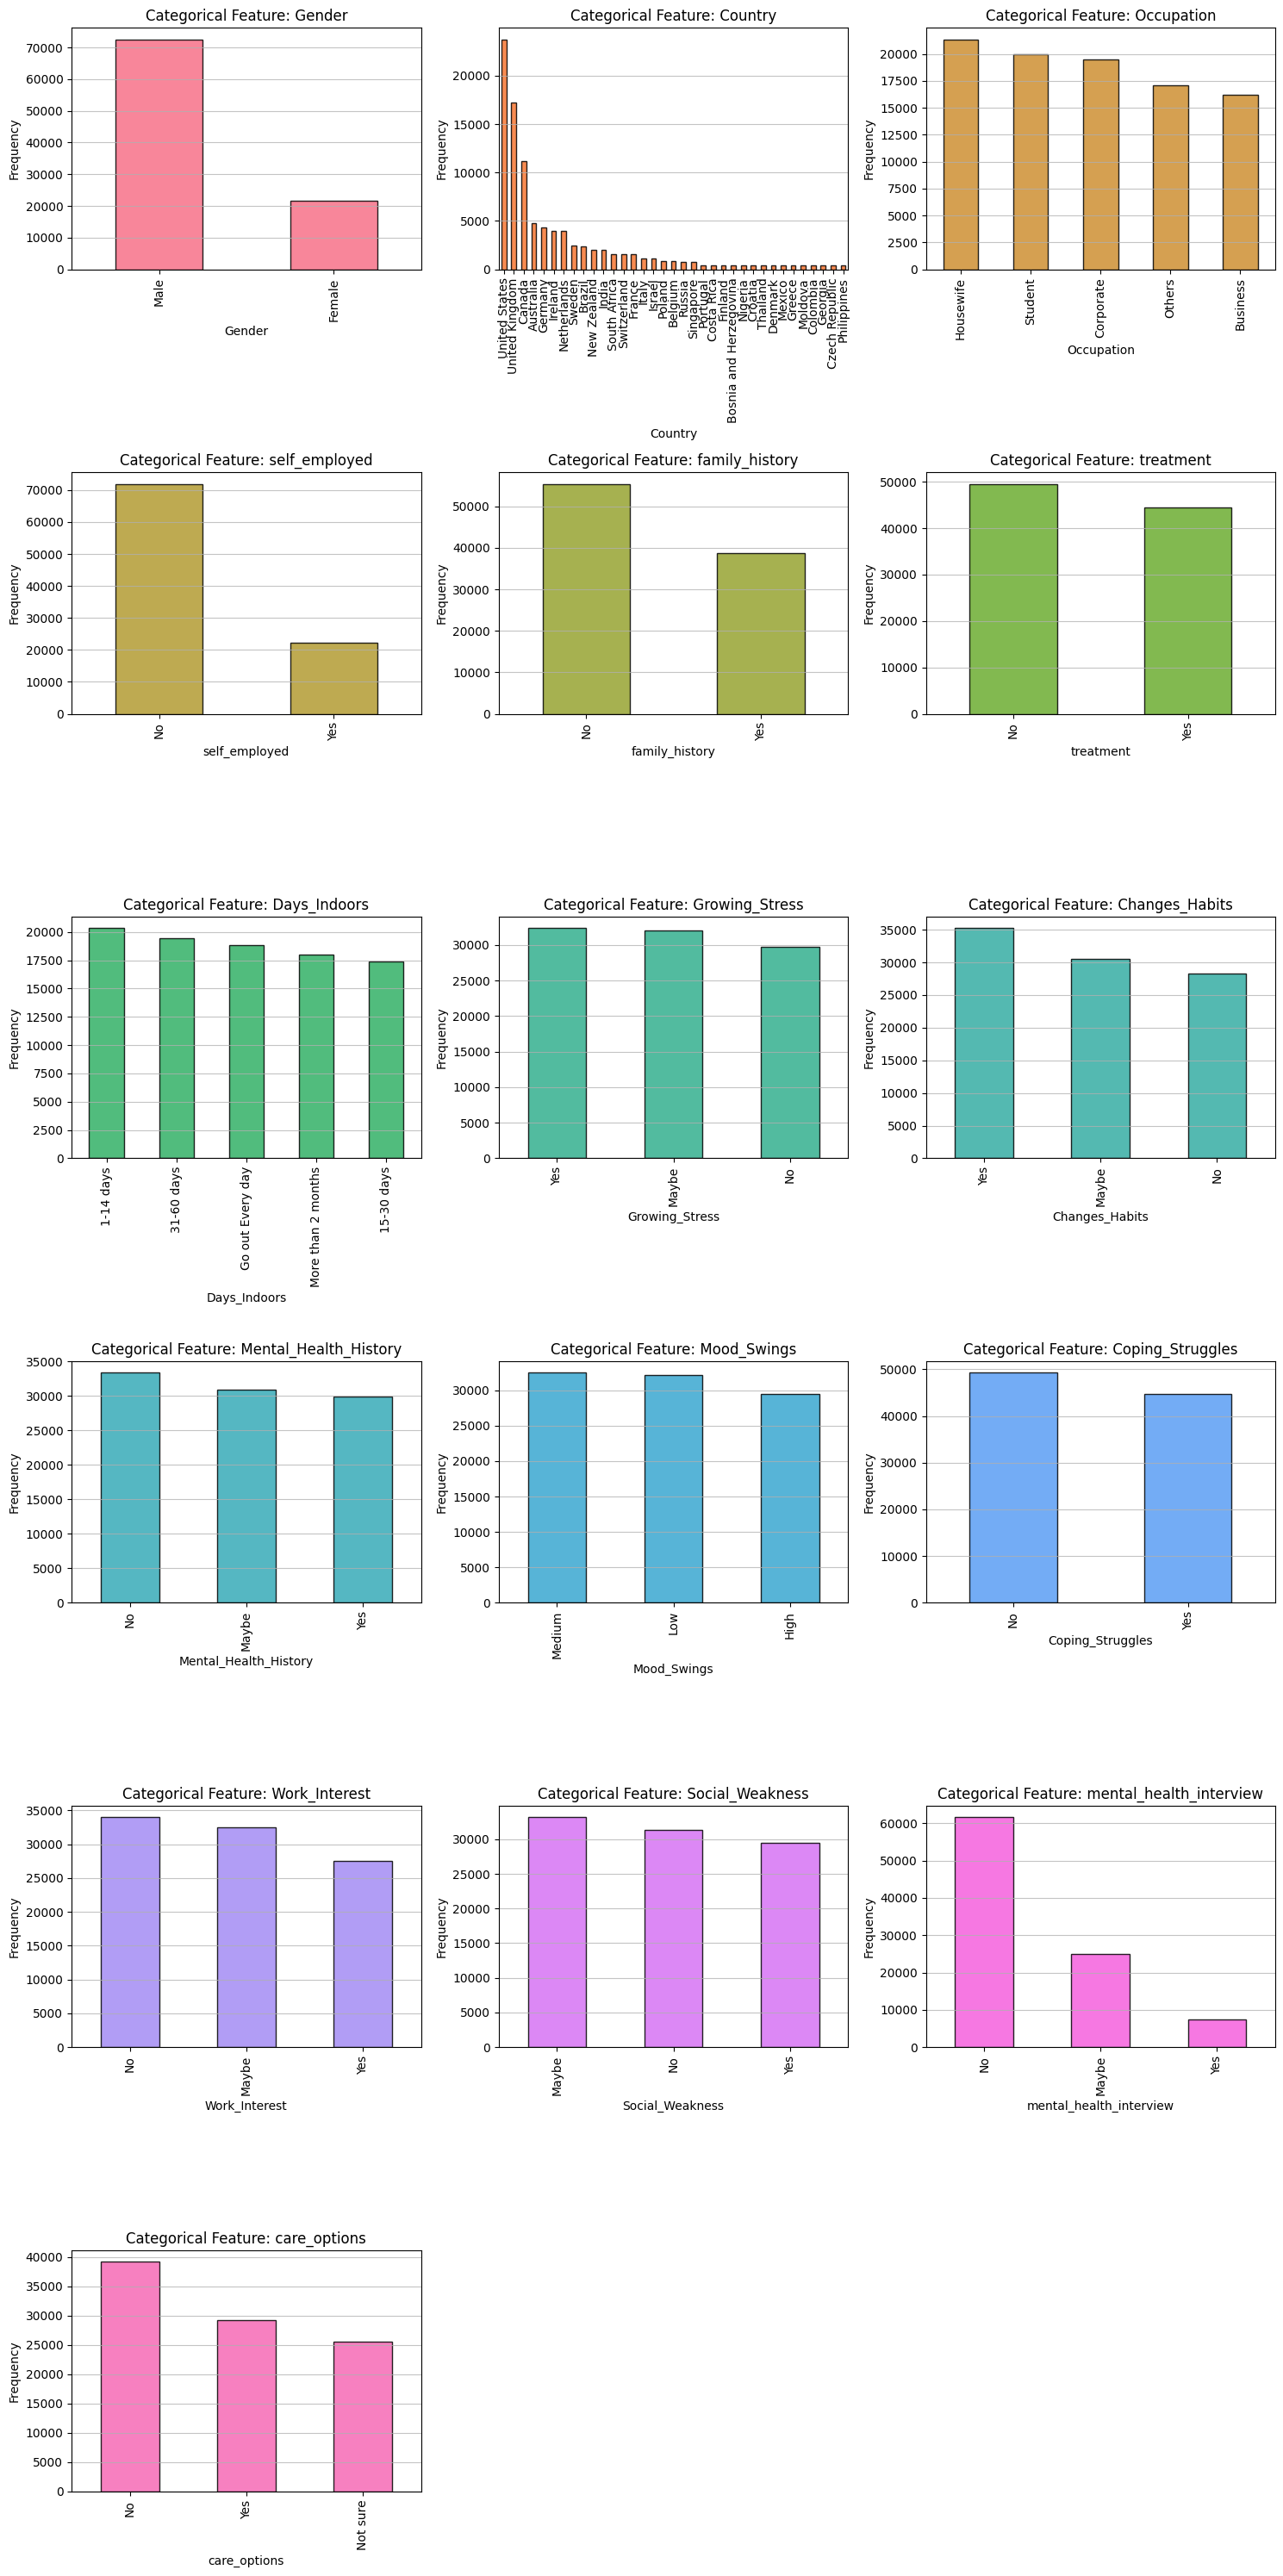

In [ ]:
# Call the function on df_abt
visualizeFeatures(MentalHealthDataCopy)

#### Visualizing Growing stress against Gender

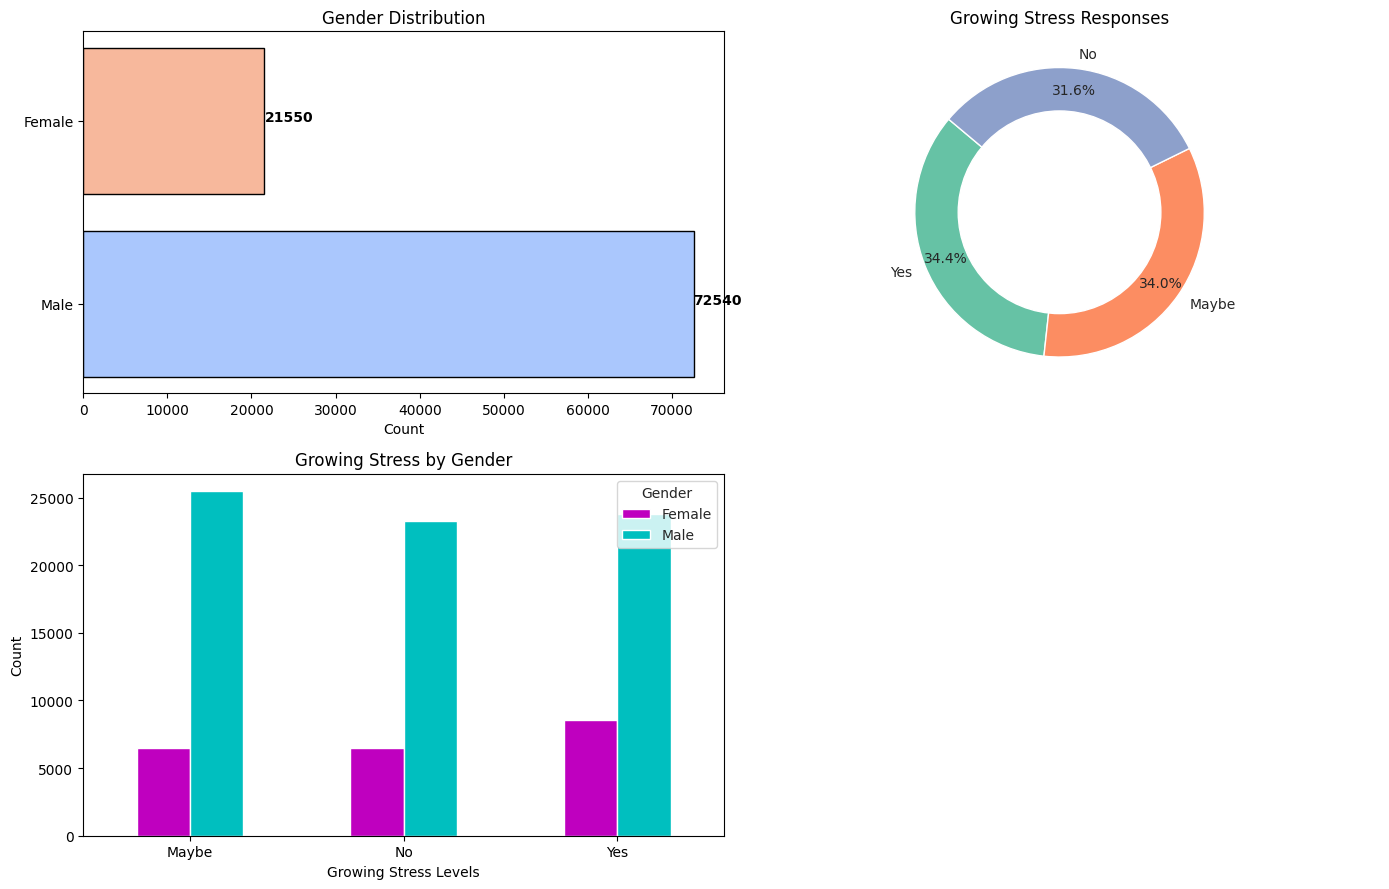

In [ ]:
# Visualizing gender with growing stress to get more insights.

def isualizeGenderVsStress(df):
    fig, axes = plt.subplots(2, 2, figsize=(14, 9))
    sns.set_style("whitegrid")

    # Bar Chart for Gender Distribution
    gender_counts = df['Gender'].value_counts()
    axes[0, 0].barh(gender_counts.index, gender_counts.values, color=sns.color_palette("coolwarm", len(gender_counts)), edgecolor='black')
    axes[0, 0].set_xlabel('Count')
    axes[0, 0].set_title('Gender Distribution')
    for i, v in enumerate(gender_counts.values):
        axes[0, 0].text(v + 1, i, str(v), color='black', fontsize=10, fontweight='bold')

    # Donut Chart for Stress Levels
    stress_counts = df['Growing_Stress'].value_counts()
    wedges, texts, autotexts = axes[0, 1].pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%',
                                              colors=sns.color_palette("Set2", len(stress_counts)), startangle=140, pctdistance=0.85)
    center_circle = plt.Circle((0,0), 0.70, fc='white')
    axes[0, 1].add_artist(center_circle)
    axes[0, 1].set_title('Growing Stress Responses')

    # Bar Chart: Growing Stress by Gender
    df = pd.crosstab(df.Growing_Stress, df.Gender).plot(kind='bar', color=['m', 'c'], ax=axes[1, 0])
    axes[1, 0].grid(False)
    axes[1, 0].set_title('Growing Stress by Gender')
    axes[1, 0].set_xlabel("Growing Stress Levels")
    axes[1, 0].set_ylabel("Count")
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

    axes[1, 1].axis('off')
    plt.tight_layout()
    plt.show()

isualizeGenderVsStress(MentalHealthDataCopy)


The data shows that most people feel more stressed these days. Women report higher stress levels than men. This means stress affects genders differently, with women experiencing it more.

#### Visualizing growing stress by days indoor

<ipython-input-20-2bbf08b55f8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Days_Indoors", y="Growing_Stress", data=df, palette="Set2", inner="quart", linewidth=1.5)


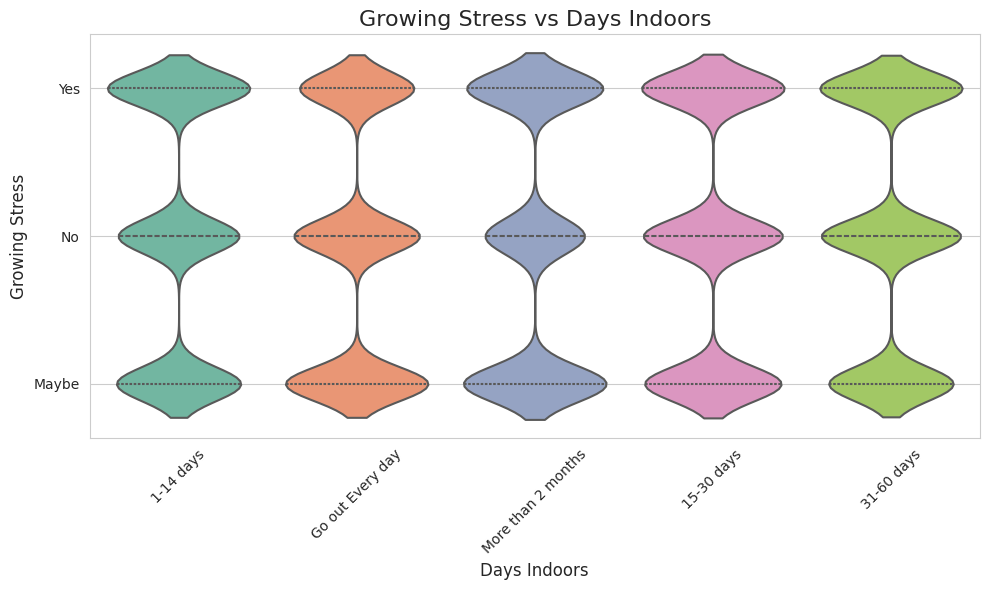

In [ ]:
def visualizeDaysIndoorVsStress(df):
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    plt.title("Growing Stress vs Days Indoors", fontsize=16)
    sns.violinplot(x="Days_Indoors", y="Growing_Stress", data=df, palette="Set2", inner="quart", linewidth=1.5)

    plt.xlabel("Days Indoors", fontsize=12)
    plt.ylabel("Growing Stress", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()

visualizeDaysIndoorVsStress(MentalHealthDataCopy)

There is a relatively equal distribution across the "Days Indoors" feature. Individuals who go outside daily tend to experience lower levels of stress compared to those who stay indoors for extended periods, such as more than two months. This observation supports the notion that spending time outdoors may help reduce stress.

#### Visualizing growing stress by mental health history

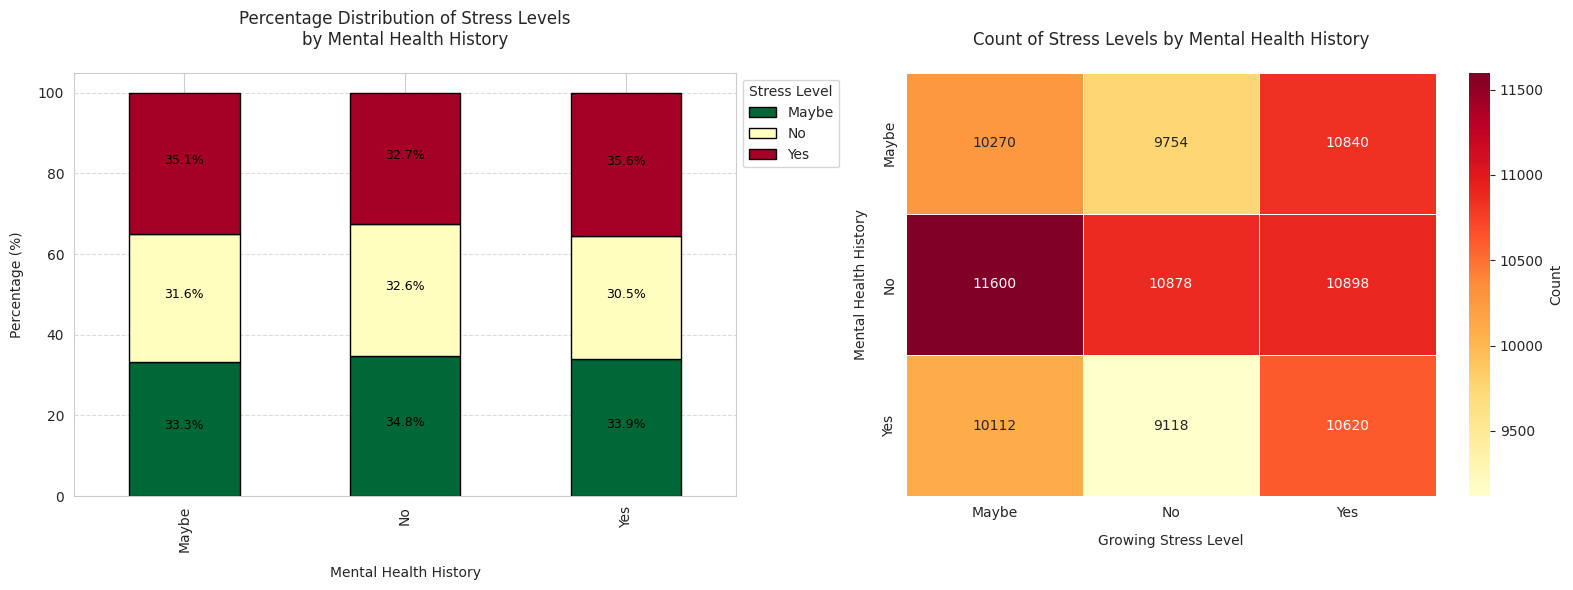

In [ ]:
def visualizeMentalHealthHistoryVsStress(df):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.set_style("whitegrid")

    # Plot 1: Stacked bar chart showing stress distribution by mental health history
    cross_tab = pd.crosstab(df['Mental_Health_History'],
                           df['Growing_Stress'],
                           normalize='index') * 100

    cross_tab.plot(kind='bar', stacked=True, ax=axes[0],
                  colormap='RdYlGn_r', edgecolor='black')
    axes[0].set_title('Percentage Distribution of Stress Levels\nby Mental Health History', pad=20)
    axes[0].set_xlabel('Mental Health History', labelpad=10)
    axes[0].set_ylabel('Percentage (%)', labelpad=10)
    axes[0].legend(title='Stress Level', bbox_to_anchor=(1, 1))
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab.loc[x], cross_tab.loc[x].cumsum()):
            if proportion > 5:  # Only show labels for segments >5% to avoid clutter
                axes[0].text(x=n, y=y_loc-proportion/2,
                           s=f'{proportion:.1f}%',
                           color='black', fontsize=9, ha='center')

    # Plot 2: Heatmap showing normalized counts
    cross_tab_counts = pd.crosstab(df['Mental_Health_History'],
                                 df['Growing_Stress'])
    sns.heatmap(cross_tab_counts, annot=True, fmt='d', cmap='YlOrRd',
               linewidths=0.5, ax=axes[1], cbar_kws={'label': 'Count'})
    axes[1].set_title('Count of Stress Levels by Mental Health History', pad=20)
    axes[1].set_xlabel('Growing Stress Level', labelpad=10)
    axes[1].set_ylabel('Mental Health History', labelpad=10)

    plt.tight_layout()
    plt.show()

visualizeMentalHealthHistoryVsStress(MentalHealthDataCopy)

Individuals with a prior mental health history ("Yes") report the highest stress levels (35.6%), while those with no history ("No") show moderate stress (32.7%). The "Maybe" group mirrors the "Yes" group, suggesting potential undiagnosed issues or stigma.

#### Visualizing growing stress by work interest

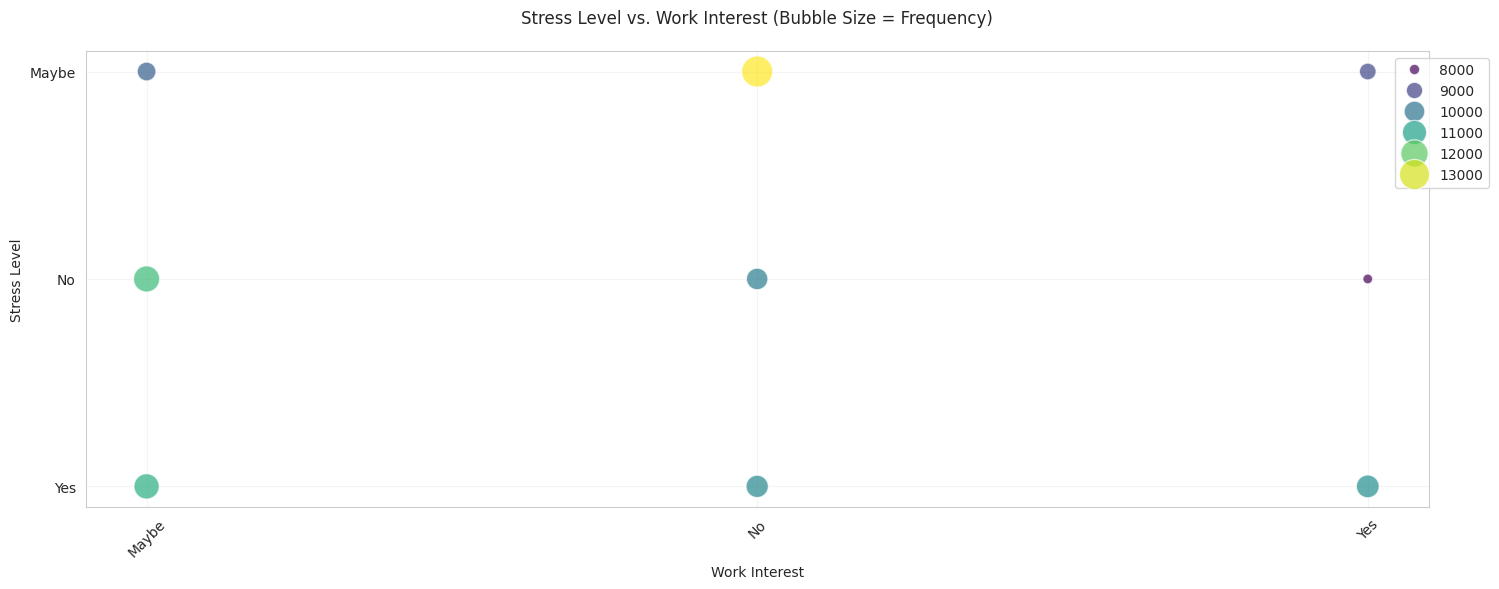

In [ ]:
def bubbleWorkStress(df):
    agg_data = df.groupby(['Work_Interest', 'Growing_Stress']).size().reset_index(name='Count')

    plt.figure(figsize=(15,6))
    sns.scatterplot(data=agg_data, x='Work_Interest', y='Growing_Stress',
                    size='Count', sizes=(50, 500), hue='Count',
                    palette='viridis', alpha=0.7)
    plt.title('Stress Level vs. Work Interest (Bubble Size = Frequency)', pad=20)
    plt.xlabel('Work Interest')
    plt.ylabel('Stress Level')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

bubbleWorkStress(MentalHealthDataCopy)

People highly interested in their work report the most stress, while those unsure ("Maybe") experience moderate levels. Even individuals disengaged from work feel stress, likely due to external pressures. The data suggests that passion for work amplifies stress, but avoiding work doesn’t eliminate it.

#### Growing Stress Across Different Categorical Features

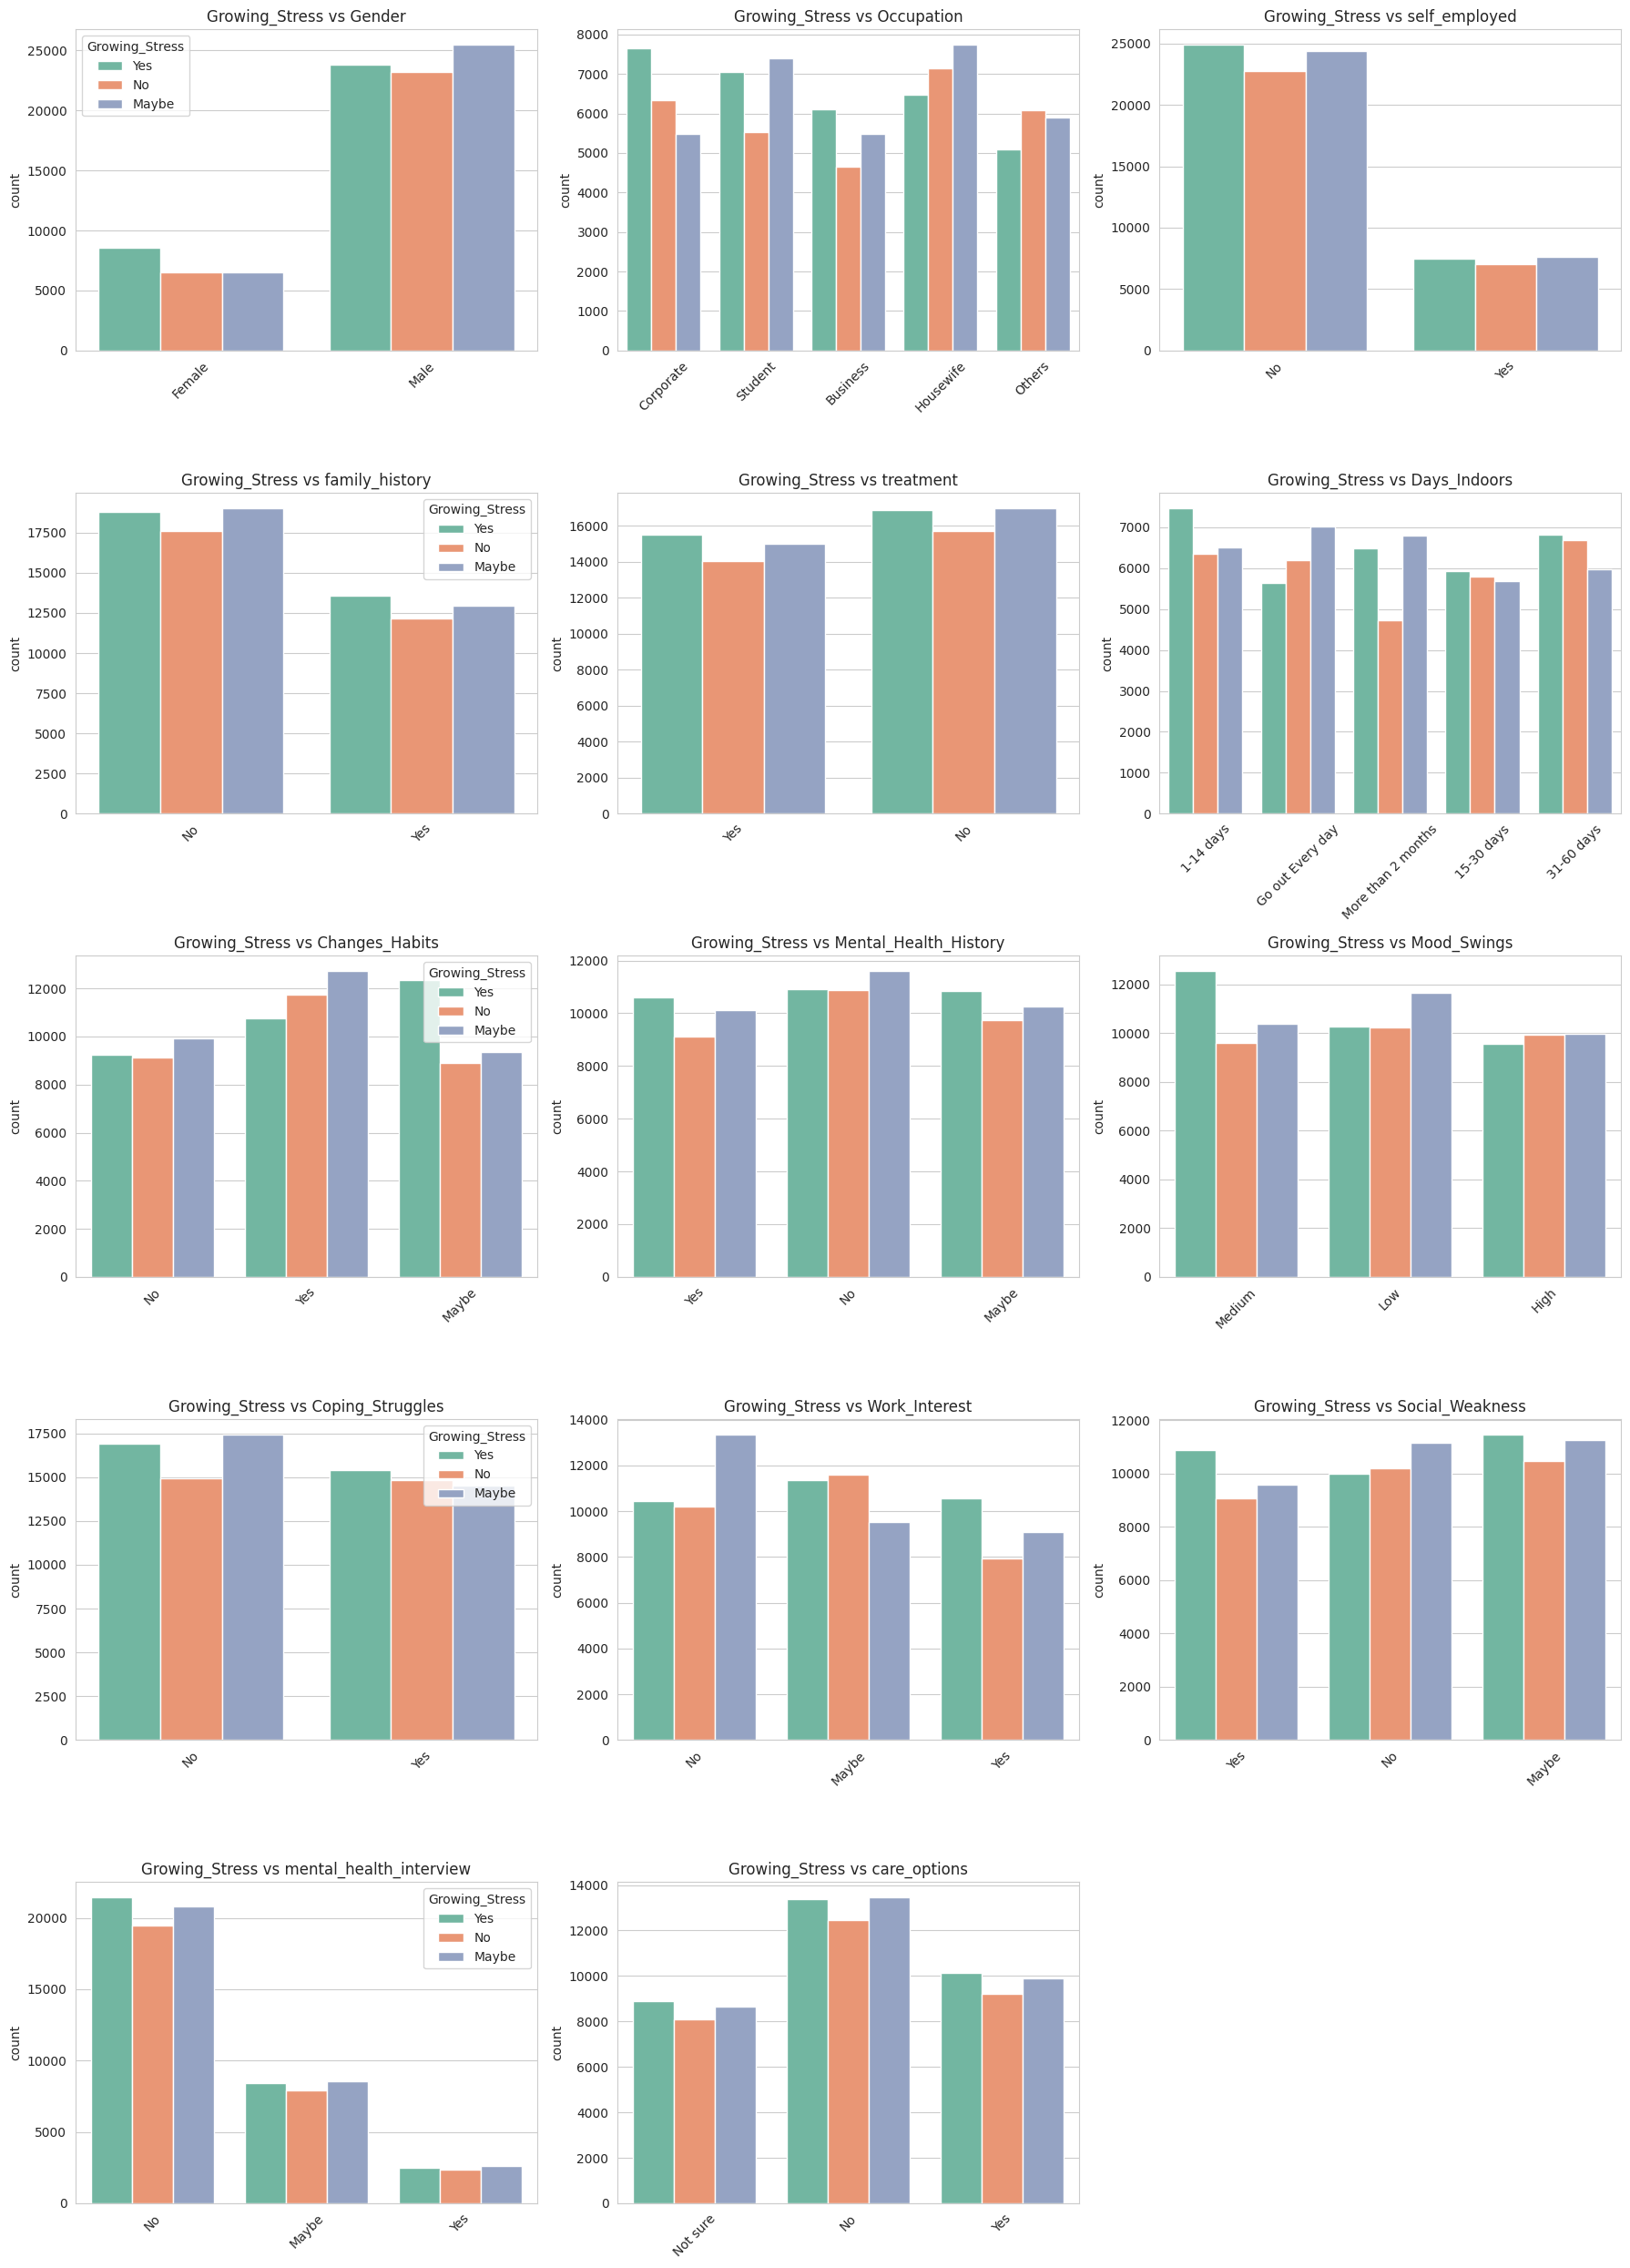

In [ ]:
def plotMatrixBarplots(df, target='Growing_Stress', exclude_cols=[], plots_per_row=3):
    features = [col for col in df.columns
               if col not in [target] + exclude_cols
               and col != 'index'
               and df[col].nunique() <= 20]  # Skip high-cardinality features

    # Calculate grid size
    n_features = len(features)
    n_rows = int(np.ceil(n_features / plots_per_row))

    fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    # Plot each feature
    for i, feature in enumerate(features):
        row = i // plots_per_row
        col = i % plots_per_row
        ax = axes[row, col]

        try:
            sns.countplot(x=feature, hue=target, data=df, ax=ax, palette='Set2')

            ax.set_title(f'{target} vs {feature}', fontsize=12)
            ax.set_xlabel('')
            ax.tick_params(axis='x', rotation=45)

            if col != 0:
                ax.get_legend().remove()

        except Exception as e:
            ax.set_title(f"⚠️ {feature} (Error)")
            print(f"Skipped {feature}: {str(e)}")

    for i in range(n_features, n_rows * plots_per_row):
        row = i // plots_per_row
        col = i % plots_per_row
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

plotMatrixBarplots(MentalHealthDataCopy, exclude_cols=['Country'])

# 2. Feature Selection

## 2.1 Feature Correlation Heatmap

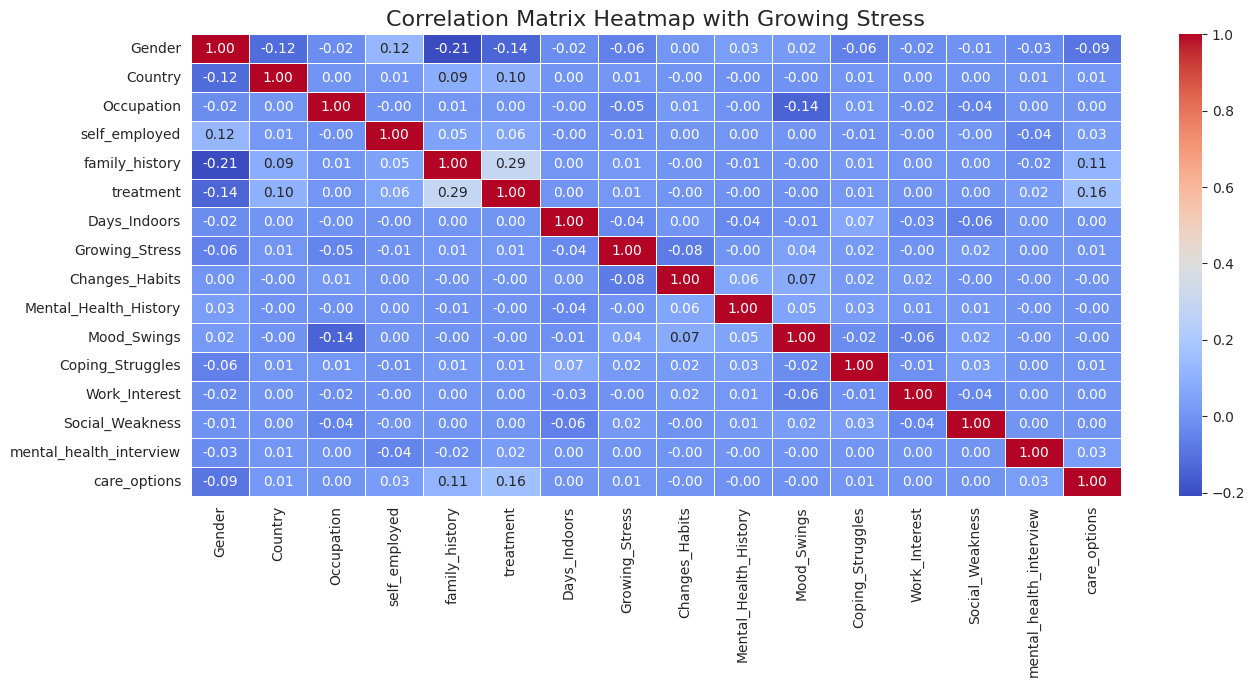

In [ ]:
def plotCorrelationMatrix(df):

    df_copy = df.copy()
    # Encode categorical variables
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    for col in df_copy.select_dtypes(exclude=['number']).columns:
        df_copy[col] = labelencoder.fit_transform(df_copy[col])

    # Compute correlation matrix
    corr_matrix = df_copy.corr()

    # Plot heatmap
    plt.figure(figsize=(15,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    plt.title("Correlation Matrix Heatmap with Growing Stress", fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

plotCorrelationMatrix(MentalHealthDataCopy)

## 2.2 Statistical Analysis

### 2.2.1 Chi-Square Test

In this section, we have performed the Chi-Square Test. This statistical test helps us to determine if there are significant associate between two categorical feature.

**Null Hypothesis (H0): The two variables are independent.**

The test is performed between all the categorical feature and "Growing_Stress" feature, this will further help us to discard all those feature that are independent of the growing stress.

In [ ]:
# Perform Chi-Square test of independence for all categorical features against the target variable.
def performChiSquareTest(df, target_variable='Growing_Stress'):

    chi_square_results = []

    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    print(categorical_columns)
    for column in categorical_columns:
        if column != target_variable:
            # This creates a contigency table for the two features.
            crosstab = pd.crosstab(df[column], df[target_variable])

            # Perform the Chi-Square test
            stat, p, dof, expected = chi2_contingency(crosstab, correction=True)

            # Calculate the critical value based on the degrees of freedom and a significance level of 0.05
            prob = 0.95
            critical_value = chi2.ppf(prob, dof)

            # Determine if the null hypothesis is rejected (p-value < 0.05)
            reject_null = "Null Hypothesis (H0) Rejected" if p <= (1 - prob) else "Failed to reject Null Hypothesis (H0)"

            chi_square_results.append({
                'Feature': column,
                'Chi-Square Statistic': stat,
                'Degrees of Freedom': dof,
                'P-Value': p,
                'Critical Value': critical_value,
                'Conclusion': reject_null
            })

    chi_square_results_df = pd.DataFrame(chi_square_results)
    return chi_square_results_df


In [ ]:
chiSquareTestResult = performChiSquareTest(MentalHealthDataCopy, target_variable='Growing_Stress')

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')


In [ ]:
chiSquareTestResult.head(20)

,Feature,Chi-Square Statistic,Degrees of Freedom,P-Value,Critical Value,Conclusion
0,Gender,366.272133,2,2.917540e-80,5.991465,Null Hypothesis (H0) Rejected
1,Country,35.366480,68,9.996353e-01,88.250164,Failed to reject Null Hypothesis (H0)
2,Occupation,938.927689,8,2.258792e-197,15.507313,Null Hypothesis (H0) Rejected
3,self_employed,5.479170,2,6.459714e-02,5.991465,Failed to reject Null Hypothesis (H0)
4,family_history,16.058013,2,3.258718e-04,5.991465,Null Hypothesis (H0) Rejected
5,treatment,7.022174,2,2.986443e-02,5.991465,Null Hypothesis (H0) Rejected
6,Days_Indoors,621.880368,8,4.618170e-129,15.507313,Null Hypothesis (H0) Rejected
7,Changes_Habits,758.003163,4,9.582747e-163,9.487729,Null Hypothesis (H0) Rejected
8,Mental_Health_History,77.742353,4,5.237472e-16,9.487729,Null Hypothesis (H0) Rejected
9,Mood_Swings,427.430255,4,3.285202e-91,9.487729,Null Hypothesis (H0) Rejected


From the Chi-Square it is evident that:-

1) Country, Self-Employed Status, and care_options failed to reject the null hypothesis, implying no significant relationship with stress.

2) Days Indoors and Work interest have very high Chai-Square statistics suggesting substatial dependency with Growing_Stress.

These findings highlight the importance of lifestyle choices, mental health history, and personal habits in determining stress levels while suggesting that external factors like geographic location or employment type may not play a major role.

### 2.2.2 Mutual Information (MI)

Mutual information also quantifies the dependency between two categorical variables.

It tells us how much knowing the value of one variable reduces uncertainty about the other. Higher MI values signifies strong dependency between the features.

In [ ]:
#Returns bottom 5 features
def calculateBottom5MutualInformation(df1, target_var='Growing_Stress'):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd

    df_encoded_MI = df1.copy()

    # Convert categorical variables to numeric using Label Encoding
    label_encoders = {}
    for col in df_encoded_MI.columns:
        if df_encoded_MI[col].dtype == 'object':
            le = LabelEncoder()
            df_encoded_MI[col] = le.fit_transform(df_encoded_MI[col])
            label_encoders[col] = le

    X = df_encoded_MI.drop(columns=[target_var])
    y = df_encoded_MI[target_var]

    mi_scores = mutual_info_classif(X, y, discrete_features=True)

    mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
    mi_df.sort_values(by="MI Score", ascending=True, inplace=True)

    return mi_df.head(5)


In [ ]:
mi_results = calculateBottom5MutualInformation(MentalHealthDataCopy, target_var='Growing_Stress')
print(mi_results)

                    Feature  MI Score
14             care_options  0.000023
3             self_employed  0.000029
5                 treatment  0.000037
13  mental_health_interview  0.000060
4            family_history  0.000085


## 2.3 Feature Engineering

It is evident from the above tests that:-

1) Top Features like Work_Interest, Occupation, Changes_Habits, Days_Indoors, and Mood_Swings show strong and consistent association with the target across ANOVA, and Chi-Square. These are important and should be retained.

2) Statistical evidence supports that many features are significantly related to the target (very low p-values), even if MI scores are numerically small.

3) A few features show no meaningful relationship with the target — they have low MI, low F-values, and high Chi-Square p-values. These likely add noise and should be removed. These features involve:- **care_options, self_employed, and Country.**

In [ ]:
def dropIrrelevantFeatures(df):
    features_to_drop = ['care_options', 'self_employed', 'Country']

    df_cleaned = df.drop(columns=[col for col in features_to_drop if col in df.columns])

    return df_cleaned

MentalHealthDataCopy = dropIrrelevantFeatures(MentalHealthDataCopy)

In [ ]:
MentalHealthDataCopy.head(10)

,Gender,Occupation,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
0,Female,Corporate,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
1,Female,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
2,Female,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
3,Female,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
5,Female,Corporate,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,Female,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,Female,Corporate,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
8,Female,Corporate,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
10,Female,Corporate,Yes,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
13,Female,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
MentalHealthDataCopy.to_csv("MentalHealthDataCopy.csv", index=False)
from google.colab import files
files.download("MentalHealthDataCopy.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we will perform encoding and get the input ready for our classifier model.

In [ ]:
def getEncodedData(df):

  df_encoded = df.copy()
  encoder = LabelEncoder()

  # One-Hot Encoding (OHE) for categorical features with ≤10 unique values
  low_cardinality_cols = [
    "Gender", "Occupation", "family_history", "treatment", "Days_Indoors",
    "Changes_Habits", "Mental_Health_History", "Mood_Swings", "Coping_Struggles", "Work_Interest",
    "Social_Weakness", "mental_health_interview"
  ]

  df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality_cols)
  bool_cols = df_encoded.select_dtypes(include=['bool']).columns
  df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

  # Label Encoding for target variable "Growing_Stress"
  df_encoded["Growing_Stress"] = encoder.fit_transform(df_encoded["Growing_Stress"])

  return df_encoded

MentalHealthDataEncoded = getEncodedData(MentalHealthDataCopy)
MentalHealthDataEncoded.head(10)

,Growing_Stress,Gender_Female,Gender_Male,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,family_history_No,family_history_Yes,treatment_No,treatment_Yes,Days_Indoors_1-14 days,Days_Indoors_15-30 days,Days_Indoors_31-60 days,Days_Indoors_Go out Every day,Days_Indoors_More than 2 months,Changes_Habits_Maybe,Changes_Habits_No,Changes_Habits_Yes,Mental_Health_History_Maybe,Mental_Health_History_No,Mental_Health_History_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium,Coping_Struggles_No,Coping_Struggles_Yes,Work_Interest_Maybe,Work_Interest_No,Work_Interest_Yes,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes
0,2,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
1,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
2,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
3,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0
5,2,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0
6,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
7,2,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
8,2,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
10,2,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
13,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0


In [ ]:
# MentalHealthDataEncoded.to_csv("MentalHealthDataEncoded.csv", index=False)
# from google.colab import files
# files.download("MentalHealthDataEncoded.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Split the data into training (80%) and testing (20%) sets
scaler = StandardScaler()
scaled_features = scaler.fit_transform(MentalHealthDataEncoded.drop(columns=["Growing_Stress"]))
df_encoded_scaled = pd.DataFrame(scaled_features, columns=MentalHealthDataEncoded.columns[:-1])
df_encoded_scaled["Growing_Stress"] = MentalHealthDataEncoded["Growing_Stress"]

X = MentalHealthDataEncoded.drop(columns=["Growing_Stress"])
y = MentalHealthDataEncoded["Growing_Stress"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# #This code stores the scaler and X (columns) in a joblib file for future use

# if not os.path.exists("saved_models"):
#     os.makedirs("saved_models")

# joblib.dump(scaler, "saved_models/scaler.joblib")

# joblib.dump(X.columns.tolist(), "saved_models/encoded_columns.joblib")

['saved_models/encoded_columns.joblib']

In [ ]:
def list_categorical_unique_values(df):
    unique_values = {}

    for col in df.select_dtypes(include=['object', 'category']).columns:
        uniques = df[col].unique().tolist()
        unique_values[col] = uniques

    return unique_values

list_categorical_unique_values(MentalHealthDataCopy)

{'Gender': ['Female', 'Male'],
 'Occupation': ['Corporate', 'Student', 'Business', 'Housewife', 'Others'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'Days_Indoors': ['1-14 days',
  'Go out Every day',
  'More than 2 months',
  '15-30 days',
  '31-60 days'],
 'Growing_Stress': ['Yes', 'No', 'Maybe'],
 'Changes_Habits': ['No', 'Yes', 'Maybe'],
 'Mental_Health_History': ['Yes', 'No', 'Maybe'],
 'Mood_Swings': ['Medium', 'Low', 'High'],
 'Coping_Struggles': ['No', 'Yes'],
 'Work_Interest': ['No', 'Maybe', 'Yes'],
 'Social_Weakness': ['Yes', 'No', 'Maybe'],
 'mental_health_interview': ['No', 'Maybe', 'Yes']}

# 3. Model Training

## 3.1 Model Tuning with Hyperparameters

In [ ]:
def tuneModelAndSummarize(X_train, X_test, y_train, y_test, cv=5, n_iter=40):
    model_summary = []
    bestTrainedModels = {}

    param_grids = {
        "RandomForest": {
            'n_estimators': [100, 150, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        "DecisionTree": {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        "XGBoost": {
            'n_estimators': [100, 150],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        },
        "KNN": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        },
        "LogisticRegression": {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs'],
            'penalty': ['l2']
        }
    }

    base_models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
        "KNN": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
    }

    for name, model in base_models.items():
        print(f"\n Tuning {name}...")
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=n_iter,
            cv=cv,
            n_jobs=-1,
            verbose=0,
            random_state=42
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        bestTrainedModels[name] = best_model

        print(f"\nDetailed Fold Performance for {name}:")
        fold_scores = cross_val_score(
            best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1
        )
        fold_scores_rounded = [round(score, 4) for score in fold_scores]
        mean_acc = round(np.mean(fold_scores), 4)
        std_acc = round(np.std(fold_scores), 4)

        model_summary.append({
            "Model": name,
            "Test Accuracy": round(test_acc, 4),
            "Best Hyperparameters": search.best_params_,
            "Fold Scores": fold_scores_rounded,  # Store list of fold scores
            "Mean CV Accuracy": mean_acc,
            "Std CV Accuracy": std_acc
        })

    model_summary_df = pd.DataFrame(model_summary)

    return model_summary_df, bestTrainedModels



In [ ]:
[model_summary_df, bestTrainedModels] = tuneModelAndSummarize(X_train, X_test, y_train, y_test)


 Tuning RandomForest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Detailed Fold Performance for RandomForest:

 Tuning DecisionTree...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Detailed Fold Performance for DecisionTree:

 Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:40:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Detailed Fold Performance for XGBoost:

 Tuning KNN...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=40. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Detailed Fold Performance for KNN:

 Tuning LogisticRegression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=40. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Detailed Fold Performance for LogisticRegression:


In [ ]:
model_summary_df

,Model,Test Accuracy,Best Hyperparameters,Fold Scores,Mean CV Accuracy,Std CV Accuracy
0,RandomForest,0.9906,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}","[0.9903, 0.9901, 0.9906, 0.9901, 0.9881]",0.9898,0.0009
1,DecisionTree,0.9888,"{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}","[0.989, 0.9881, 0.9895, 0.9884, 0.9873]",0.9885,0.0007
2,XGBoost,0.9908,"{'subsample': 1.0, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.1}","[0.9902, 0.9904, 0.9904, 0.99, 0.9882]",0.9898,0.0008
3,KNN,0.9902,"{'weights': 'distance', 'p': 1, 'n_neighbors': 3}","[0.9898, 0.9898, 0.9903, 0.991, 0.9883]",0.9898,0.0009
4,LogisticRegression,0.4387,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}","[0.4362, 0.4404, 0.444, 0.4405, 0.4393]",0.4401,0.0025


<ipython-input-45-12b815f7f373>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_high, x="Model", y="Fold Accuracy", palette="Set2")


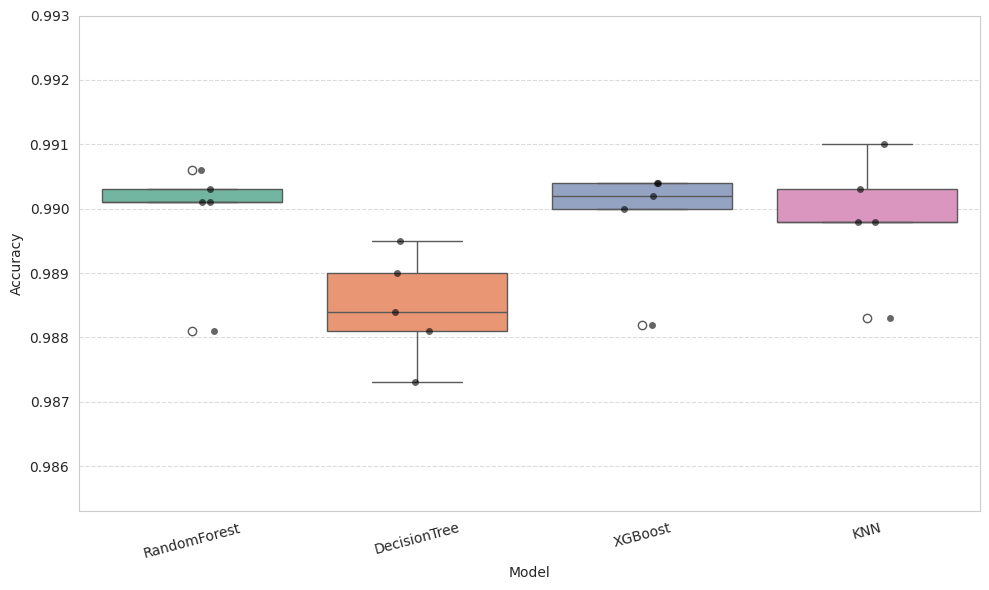

In [ ]:
def plot_high_accuracy_models(model_summary_df, threshold=0.9):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Convert fold scores into long-format DataFrame
    data = []
    for _, row in model_summary_df.iterrows():
        for score in row["Fold Scores"]:
            data.append({
                "Model": row["Model"],
                "Fold Accuracy": score
            })

    df_long = pd.DataFrame(data)

    # Filter for high-accuracy models
    high_perf_models = df_long[df_long["Fold Accuracy"] >= threshold]["Model"].unique()
    df_high = df_long[df_long["Model"].isin(high_perf_models)]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_high, x="Model", y="Fold Accuracy", palette="Set2")
    sns.stripplot(data=df_high, x="Model", y="Fold Accuracy", color="black", alpha=0.6, jitter=0.1)
    plt.ylim(df_high["Fold Accuracy"].min() - 0.002, df_high["Fold Accuracy"].max() + 0.002)
    # plt.title("Cross-Validation Accuracy (High-Accuracy Models Only)", fontsize=14)
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_high_accuracy_models(model_summary_df)

In [ ]:
# def save_models_to_joblib(models_dict, output_dir='saved_models'):
#     """
#     Saves all models in a dictionary to .joblib files.

#     """
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for model_name, model_obj in models_dict.items():
#         filename = os.path.join(output_dir, f"{model_name}.joblib")
#         joblib.dump(model_obj, filename)
#         print(f"✅ Saved: {filename}")

# save_models_to_joblib(bestTrainedModels)
# !zip -r saved_models.zip saved_models

✅ Saved: saved_models/RandomForest.joblib
✅ Saved: saved_models/DecisionTree.joblib
✅ Saved: saved_models/XGBoost.joblib
✅ Saved: saved_models/KNN.joblib
✅ Saved: saved_models/LogisticRegression.joblib
  adding: saved_models/ (stored 0%)
  adding: saved_models/RandomForest.joblib (deflated 69%)
  adding: saved_models/XGBoost.joblib (deflated 70%)
  adding: saved_models/DecisionTree.joblib (deflated 74%)
  adding: saved_models/LogisticRegression.joblib (deflated 31%)
  adding: saved_models/KNN.joblib (deflated 97%)


In [ ]:
# from google.colab import files
# files.download('saved_models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.2 Model Evaluation

In [ ]:
def evaluate_models_metrics(models_dict, X_test, y_test):
    metrics = []

    for name, model in models_dict.items():
        y_pred = model.predict(X_test)

        # Some models (like Logistic Regression) can do probability-based AUC
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        except:
            auc = np.nan  # fallback if predict_proba doesn't work

        metrics.append({
            "Model": name,
            "Accuracy": round(accuracy_score(y_test, y_pred), 4),
            "MAE": round(mean_absolute_error(y_test, y_pred), 4),
            "MSE": round(mean_squared_error(y_test, y_pred), 4),
            "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
            "Precision": round(precision_score(y_test, y_pred, average='weighted'), 4),
            "Recall": round(recall_score(y_test, y_pred, average='weighted'), 4),
            "F1 Score": round(f1_score(y_test, y_pred, average='weighted'), 4),
            "Geometric Mean": round(geometric_mean_score(y_test, y_pred), 4),
            "AUC Score": round(auc, 4) if not np.isnan(auc) else "N/A"
        })

    return pd.DataFrame(metrics)

evaluate_models_metrics(bestTrainedModels,X_test,y_test)

,Model,Accuracy,MAE,MSE,RMSE,Precision,Recall,F1 Score,Geometric Mean,AUC Score
0,RandomForest,0.9904,0.0149,0.0254,0.1594,0.9905,0.9904,0.9904,0.9903,N/A
1,DecisionTree,0.9888,0.0170,0.0286,0.1691,0.9888,0.9888,0.9888,0.9889,N/A
2,XGBoost,0.9907,0.0142,0.0240,0.1548,0.9907,0.9907,0.9907,0.9906,N/A
3,KNN,0.9901,0.0151,0.0254,0.1594,0.9901,0.9901,0.9901,0.9901,N/A
4,LogisticRegression,0.4387,0.7806,1.2193,1.1042,0.4390,0.4387,0.4340,0.4255,N/A


In [ ]:
# Function to check overfitting
def check_overfitting(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model

    train_acc = accuracy_score(y_train, model.predict(X_train))  # Training accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test))  # Testing accuracy

    print(f"{model.__class__.__name__}:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")
    print(f"Overfitting Gap:   {train_acc - test_acc:.4f}\n")  # Gap should be small

# Models to check

models = {
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    check_overfitting(model, X_train, X_test, y_train, y_test)

XGBClassifier:
Training Accuracy: 0.9907
Testing Accuracy:  0.9897
Overfitting Gap:   0.0010

RandomForestClassifier:
Training Accuracy: 0.9909
Testing Accuracy:  0.9888
Overfitting Gap:   0.0021

DecisionTreeClassifier:
Training Accuracy: 0.9909
Testing Accuracy:  0.9887
Overfitting Gap:   0.0022

KNeighborsClassifier:
Training Accuracy: 0.9905
Testing Accuracy:  0.9897
Overfitting Gap:   0.0008



## 3.3 Learning Curves

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

def plot_learning_curves(models_dict, X_train, y_train):

    # Filter only the models we need
    selected_models = ["RandomForest", "KNN", "XGBoost", "DecisionTree"]
    models_to_plot = {name: model for name, model in models_dict.items() if name in selected_models}

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 layout

    for ax, (name, model) in zip(axes.ravel(), models_to_plot.items()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, scoring="accuracy",
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )

        # Use LearningCurveDisplay
        display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores)
        display.plot(ax=ax)

        ax.set_title(f"Learning Curve - {name}")
        ax.set_xlabel("Training Examples")
        ax.set_ylabel("Accuracy")

    plt.tight_layout()
    plt.show()


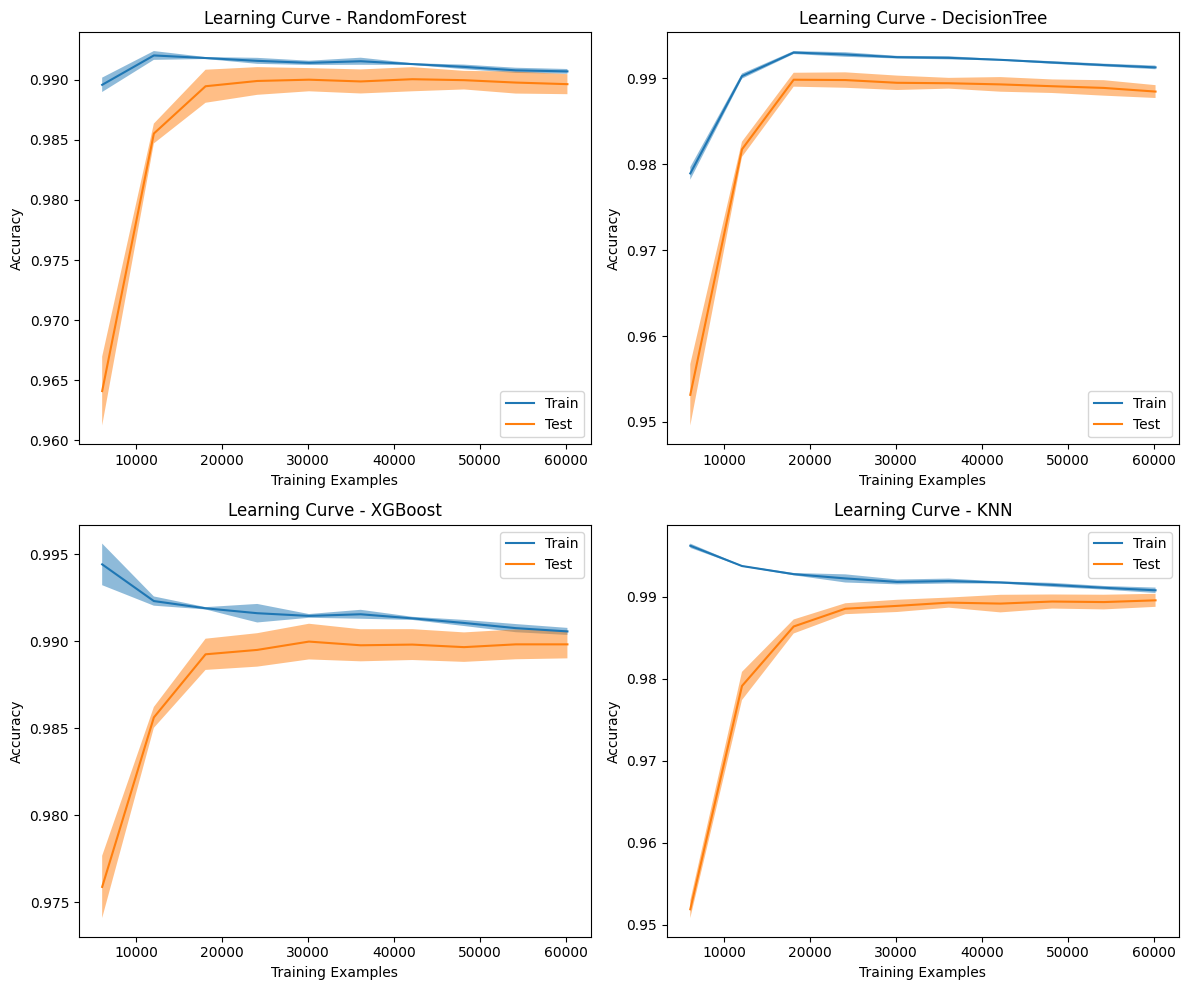

In [ ]:
plot_learning_curves(bestTrainedModels, X_train, y_train)

## 3.4 Feature Importance

In [ ]:
def get_feature_importance_matrix(models_dict, feature_names):
    import pandas as pd
    import re

    importance_data = []

    for model_name, model in models_dict.items():
        # Get importances
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
        elif hasattr(model, "coef_"):
            importances = model.coef_
            if importances.ndim > 1:
                importances = abs(importances[0])
            else:
                importances = abs(importances)
        else:
            print(f"⚠️ Skipping {model_name} — no feature importance attribute.")
            continue

        df = pd.DataFrame({
            "Encoded Feature": feature_names,
            "Importance": importances
        })

        # Extracting base feature name by removing last underscore part
        df["Original Feature"] = df["Encoded Feature"].apply(lambda x: re.split(r'_(?!.*_)', x)[0])

        # Group importance by original feature name
        grouped = df.groupby("Original Feature")["Importance"].sum().reset_index()
        grouped.columns = ["Feature", model_name]

        importance_data.append(grouped)

    # Merge all importance DataFrames on "Feature"
    importance_matrix = importance_data[0]
    for df in importance_data[1:]:
        importance_matrix = pd.merge(importance_matrix, df, on="Feature", how="outer")

    # Fill NaNs with 0 for models that skipped a feature
    importance_matrix.fillna(0, inplace=True)

    importance_matrix.set_index("Feature", inplace=True)

    return importance_matrix


importance_matrix_df = get_feature_importance_matrix(bestTrainedModels, X_train.columns)

importance_matrix_df.head(100)

⚠️ Skipping KNN — no feature importance attribute.


,RandomForest,DecisionTree,XGBoost,LogisticRegression
Feature,,,,
Changes_Habits,0.095143,0.060949,0.109951,0.165396
Coping_Struggles,0.074805,0.071188,0.034837,0.104754
Days_Indoors,0.176360,0.171792,0.198068,0.440100
Gender,0.050918,0.078281,0.035762,0.153033
Mental_Health_History,0.117880,0.099183,0.117827,0.054641
Mood_Swings,0.112249,0.113848,0.108766,0.151806
Occupation,0.159360,0.161673,0.177767,0.348041
Social_Weakness,0.119334,0.148666,0.115902,0.089305
Work_Interest,0.092155,0.094291,0.099016,0.304537


In [ ]:
def plot_feature_importance(importance_matrix_df):
    models = importance_matrix_df.columns.tolist()
    features = importance_matrix_df.index.tolist()

    x = np.arange(len(features))  # the label locations
    width = 0.2  # the width of the bars
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

    fig, ax = plt.subplots(figsize=(14, 8))

    for i, (model, color) in enumerate(zip(models, colors)):
        bars = ax.bar(x + i * width, importance_matrix_df[model], width, label=model, color=color)

        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, height + 0.01,  # Position above the bar
                f'{height:.4f}', ha='center', va='bottom', fontsize=9, rotation=90, color='black'
            )

    ax.set_xlabel("Features")
    ax.set_ylabel("Importance Values")
    ax.set_title("Feature Importance Across Models")
    ax.set_xticks(x + width * (len(models) / 2 - 0.5))
    ax.set_xticklabels(features, rotation=45)
    ax.legend()

    ax.set_yticks(np.arange(0, max(importance_matrix_df.max()) + 0.10, 0.05))

    plt.tight_layout()
    plt.show()

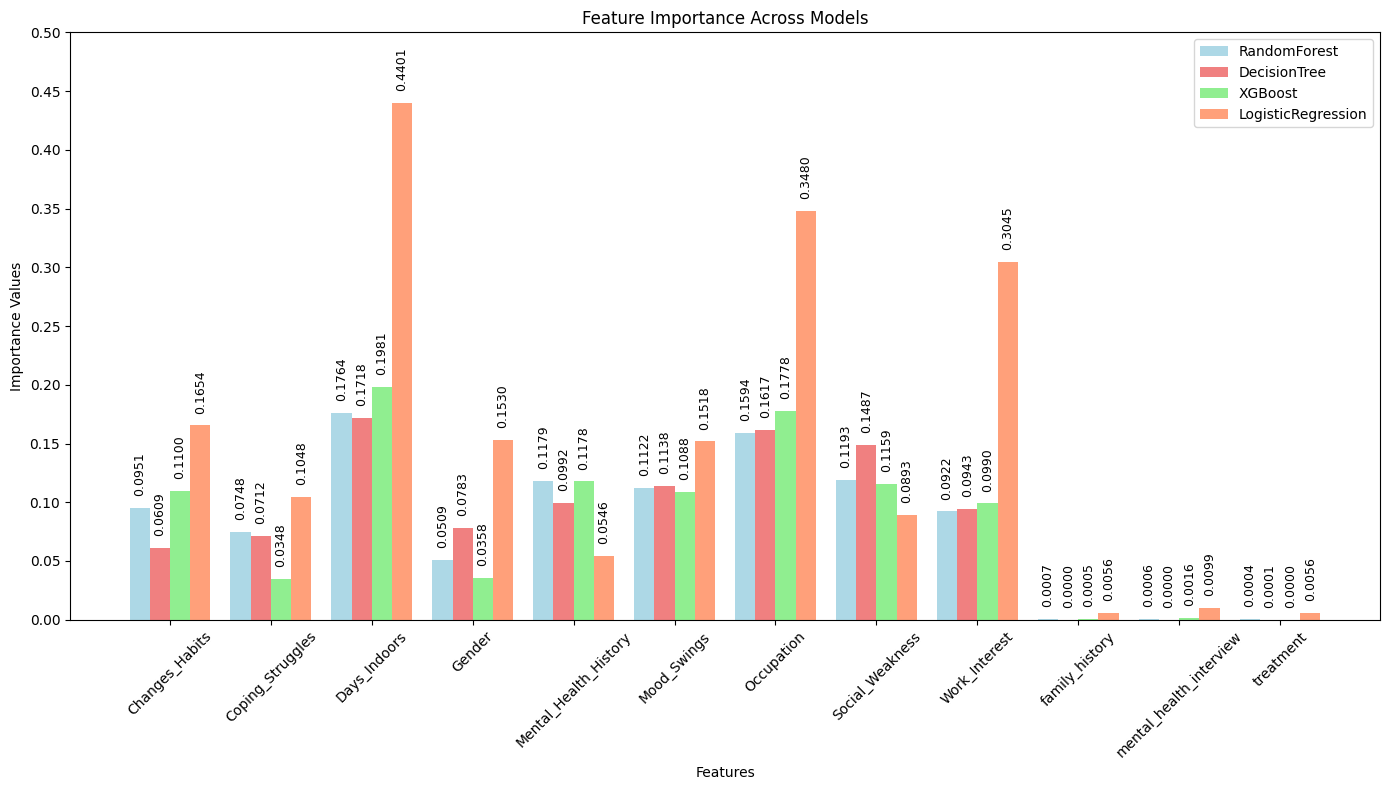

In [ ]:
plot_feature_importance(importance_matrix_df)

## 3.5 Counterfactual Analysis

Features importance tell us the importance of feature with respect to each model. But it doesn't give us an insight on how this feature can influence our result. For that we have performed a Counterfactual Analysis on our two best models, Random Forest and Decision Trees.

Counterfactual Analysis gives us an answer to the question:-

“What minimal change would have caused a different outcome?”

It means identifying how an input instance could be slightly altered to change the model's prediction.

The below function multiclass_counterfactual_analysis_all_models performs model level counterfactual analysis for the given multiclass classification using the DICE library. For the two models (Random Forest and Decision Tree), it generates counterfactual examples of a subset of a test instances and indentifies which features most frequently needed to change to alter model's prediction.

In [ ]:
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you hav

In [ ]:
import dice_ml
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def multiclass_counterfactual_analysis_all_models(models_dict, dataset, X_test, num_samples=50, cfs_per_instance=2, target_col='Growing_Stress'):
    """
    Generates model-level counterfactual analysis for all models in models_dict.

    Args:
        num_samples: Number of test samples to use.
        cfs_per_instance: Counterfactuals generated per desired class.
        target_col: Target column name.

    Returns:
        Dictionary of DataFrames containing counterfactual feature summaries per model.
    """
    categorical_features = [col for col in X_test.columns]

    results_summary = {}

    for model_name, model in models_dict.items():
        print(f"\nAnalyzing Model: {model_name}\n{'-'*40}")

        dice_data = dice_ml.Data(
            dataframe=dataset,
            continuous_features=[],
            categorical_features=categorical_features,
            outcome_name=target_col
        )

        dice_model = dice_ml.Model(model=model, backend="sklearn")
        explainer = dice_ml.Dice(dice_data, dice_model, method="random")

        feature_change_counts = {feature: 0 for feature in X_test.columns}
        samples_used = min(num_samples, len(X_test))

        selected_indices = np.random.choice(X_test.index, samples_used, replace=False)

        for idx in selected_indices:
            instance = X_test.loc[idx]
            current_pred = model.predict(instance.to_frame().T)[0]

            possible_classes = [0,1,2]
            desired_classes = [cls for cls in possible_classes if cls != current_pred]

            for desired_class in desired_classes:
                counterfactuals = explainer.generate_counterfactuals(
                    instance.to_frame().T,
                    total_CFs=cfs_per_instance,
                    desired_class=desired_class,
                    verbose=False
                )

                cf_df = counterfactuals.cf_examples_list[0].final_cfs_df.drop(columns=[target_col])

                for _, cf_instance in cf_df.iterrows():
                    for feature in X_test.columns:
                        if cf_instance[feature] != instance[feature]:
                            feature_change_counts[feature] += 1

        feature_change_summary = pd.DataFrame.from_dict(feature_change_counts, orient='index', columns=['change_count'])
        total_possible_changes = samples_used * cfs_per_instance * 2  # two alternative classes per instance
        feature_change_summary['change_frequency'] = feature_change_summary['change_count'] / total_possible_changes
        feature_change_summary.sort_values('change_frequency', ascending=False, inplace=True)

        print(feature_change_summary)

        results_summary[model_name] = feature_change_summary

    return results_summary


selected_models = {name: model for name, model in bestTrainedModels.items()
                   if 'randomforest' in name.lower() or 'decisiontree' in name.lower()}

feature_summaries = multiclass_counterfactual_analysis_all_models(
    models_dict=selected_models,
    dataset=MentalHealthDataEncoded,
    X_test=X_test,
    num_samples=2000,
    cfs_per_instance=2,
    target_col='Growing_Stress'
)



In [ ]:
def aggregate_feature_summaries(feature_summaries):
    """
    Aggregates one-hot encoded feature names into original categorical features
    across all models in feature_summaries.

    Args:
        feature_summaries: dict of {model_name: feature_importance_df}

    Returns:
        dict of {model_name: aggregated_feature_importance_df}
    """
    aggregated_dict = {}

    for model_name, summary_df in feature_summaries.items():
        aggregated = {}

        for feature in summary_df.index:
            # Try splitting only the last part after last underscore
            if '_' in feature:
                base = '_'.join(feature.split('_')[:-1])
            else:
                base = feature

            if base in aggregated:
                aggregated[base] += summary_df.loc[feature, 'change_count']
            else:
                aggregated[base] = summary_df.loc[feature, 'change_count']

        # Convert to DataFrame
        agg_df = pd.DataFrame.from_dict(aggregated, orient='index', columns=['aggregated_change_count'])
        total = agg_df['aggregated_change_count'].sum()
        agg_df['aggregated_change_frequency'] = agg_df['aggregated_change_count'] / total
        agg_df.sort_values('aggregated_change_frequency', ascending=False, inplace=True)

        aggregated_dict[model_name] = agg_df

    return aggregated_dict

In [ ]:
aggregated_feature_summaries = aggregate_feature_summaries(feature_summaries)

In [ ]:
aggregated_feature_summaries['RandomForest']

,aggregated_change_count,aggregated_change_frequency
Days_Indoors,3258,0.187998
Occupation,2584,0.149106
Work_Interest,2417,0.139469
Changes_Habits,2189,0.126313
Mood_Swings,1825,0.105309
Social_Weakness,1564,0.090248
Mental_Health_History,1215,0.070110
Gender,1025,0.059146
Coping_Struggles,896,0.051702
mental_health_interview,146,0.008425


In [ ]:
aggregated_feature_summaries['DecisionTree']


,aggregated_change_count,aggregated_change_frequency
Days_Indoors,2037,0.173717
Occupation,1853,0.158025
Changes_Habits,1233,0.105151
Work_Interest,1136,0.096879
Social_Weakness,1125,0.095941
Mood_Swings,1039,0.088607
Mental_Health_History,937,0.079908
Gender,817,0.069674
Coping_Struggles,719,0.061317
mental_health_interview,362,0.030872


Aggregated Change Count: How many times this feature had to change in counterfactual examples to flip the model's prediction.

Aggregated Change Frequency: How frequently this feature was part of the minimal change set (i.e., how “important” it is for influencing prediction decisions).

Interpretation:-

1) Occupation (17%) and Days_Indoors (17.2%) are the top features your model relies on to predict growing stress.
→ Changing a person's occupation or how long they stay indoors often flips the stress prediction.

2) Mood_Swings, Changes_Habits, and Work_Interest are also major influencers — intuitively aligned with behavioral patterns associated with stress.

3) treatment had 0 impact on prediction flips.
→ Either the model doesn’t consider it useful, or it’s not varying enough in the data to influence outcomes.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_change_summary(summary_df, model_name):
    # Sort by frequency for clean plotting
    sorted_df = summary_df.sort_values('aggregated_change_frequency', ascending=True)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='aggregated_change_frequency',
        y=sorted_df.index,
        data=sorted_df,
        palette='viridis'
    )

    # Add count labels to bars
    for i, (count, freq) in enumerate(zip(sorted_df['aggregated_change_count'], sorted_df['aggregated_change_frequency'])):
        ax.text(freq + 0.002, i, f'{count}', va='center', fontsize=9)

    plt.title(f'Feature Change Frequency with Counts - {model_name} (2000 Samples)', fontsize=14)
    plt.xlabel('Aggregated Change Frequency')
    plt.ylabel('Features')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


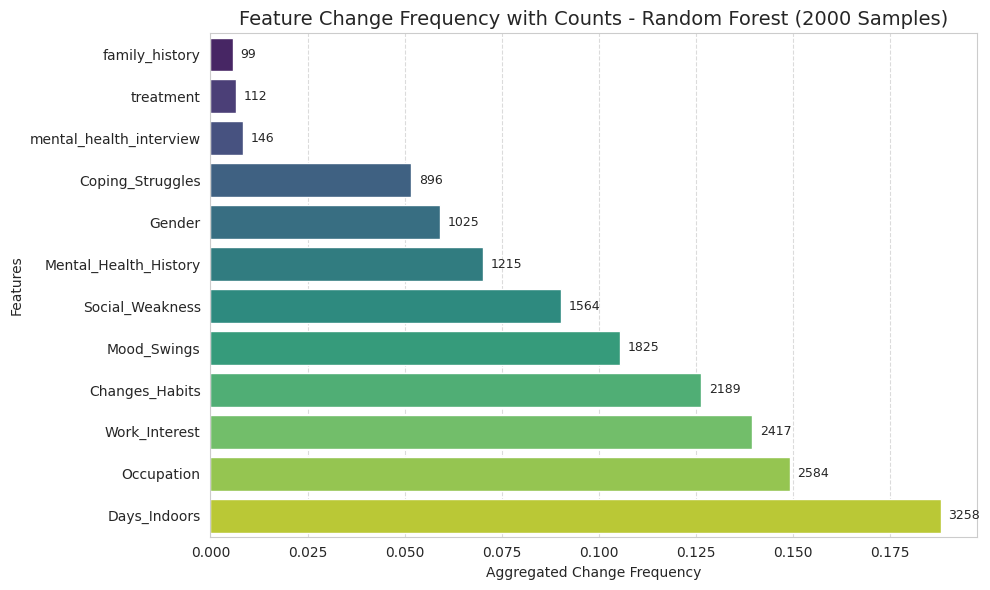

In [ ]:
plot_feature_change_summary(aggregated_feature_summaries['RandomForest'], model_name='Random Forest')

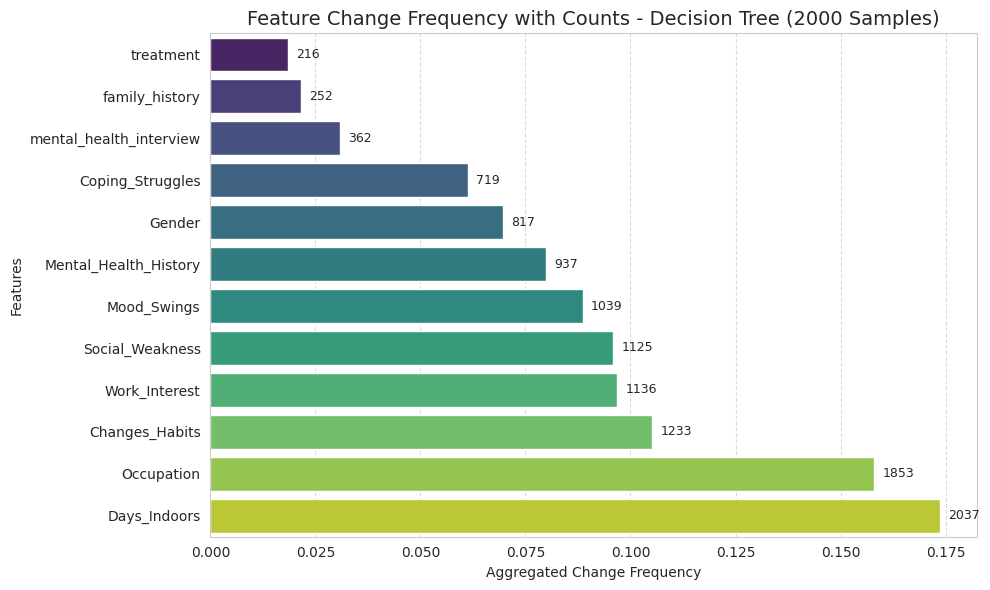

In [ ]:
plot_feature_change_summary(aggregated_feature_summaries['DecisionTree'], model_name='Decision Tree')